In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Qiskit-SuperstaQ Pulse Manipulator Example

In [3]:
import qiskit_superstaq as qss
import qiskit
import os

In [4]:
if not qiskit.IBMQ.active_account():
    qiskit.IBMQ.enable_account(os.environ["IBMQ_TOKEN"])

In [63]:
provider = qiskit.IBMQ.get_provider(hub="ibm-q-startup", group="super-tech-labs", project="default")
lagos = provider.get_backend("ibm_lagos")

          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘


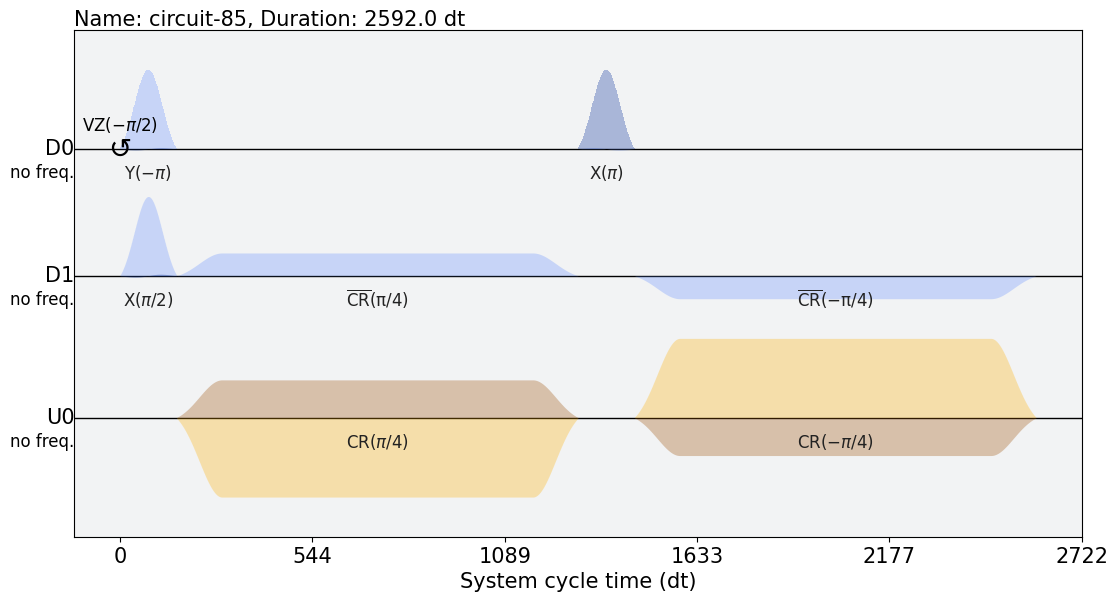

In [7]:
ism = lagos.defaults().instruction_schedule_map
qc = qiskit.QuantumCircuit(2)
qc.cx(0, 1)
print(qc.draw())
cx_schedule = qiskit.schedule(qc, backend=lagos)
cx_schedule.draw()

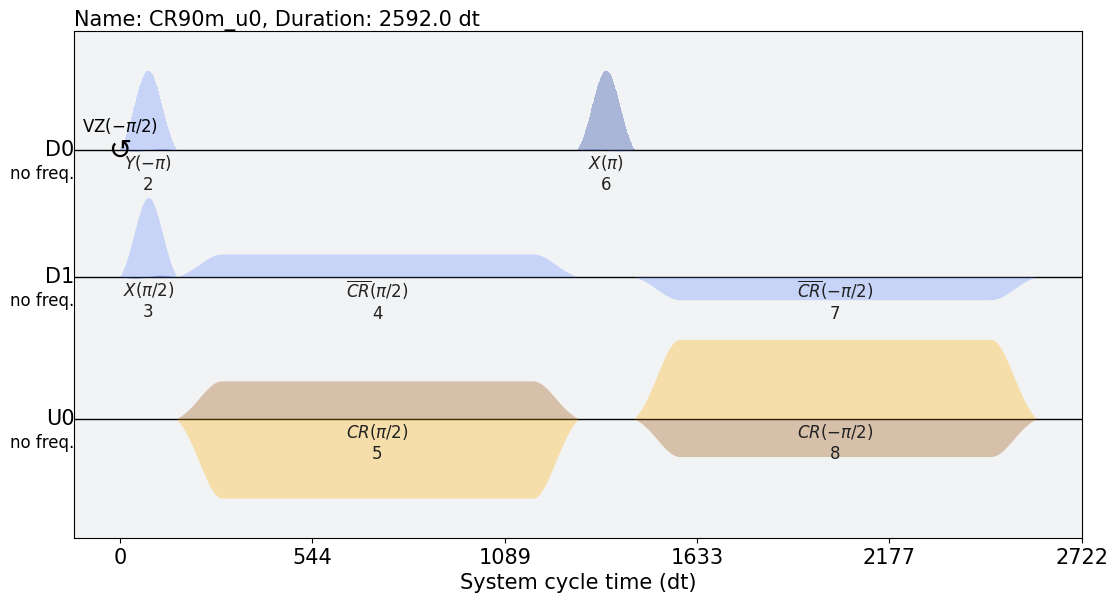

In [8]:
cx_pm = qss.PulseManipulator(cx_schedule, lagos)
cx_pm.draw()

In [9]:
cx_pm.get_duration(inst_id=7)

1136

In [10]:
cx_pm.get_start_time(inst_id=4)

160

In [11]:
cx_pm.get_duration(inst_id=3)

160

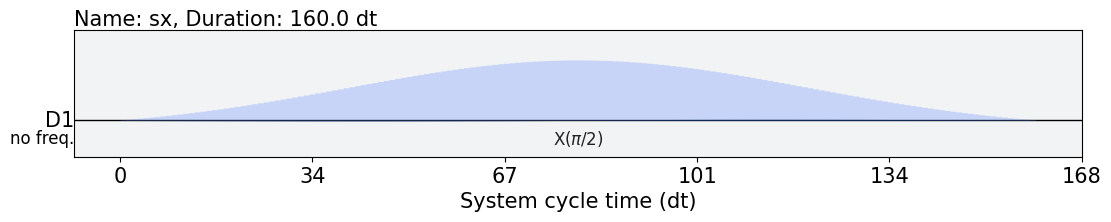

In [12]:
inst = ism.get("sx", 1)
inst.draw()

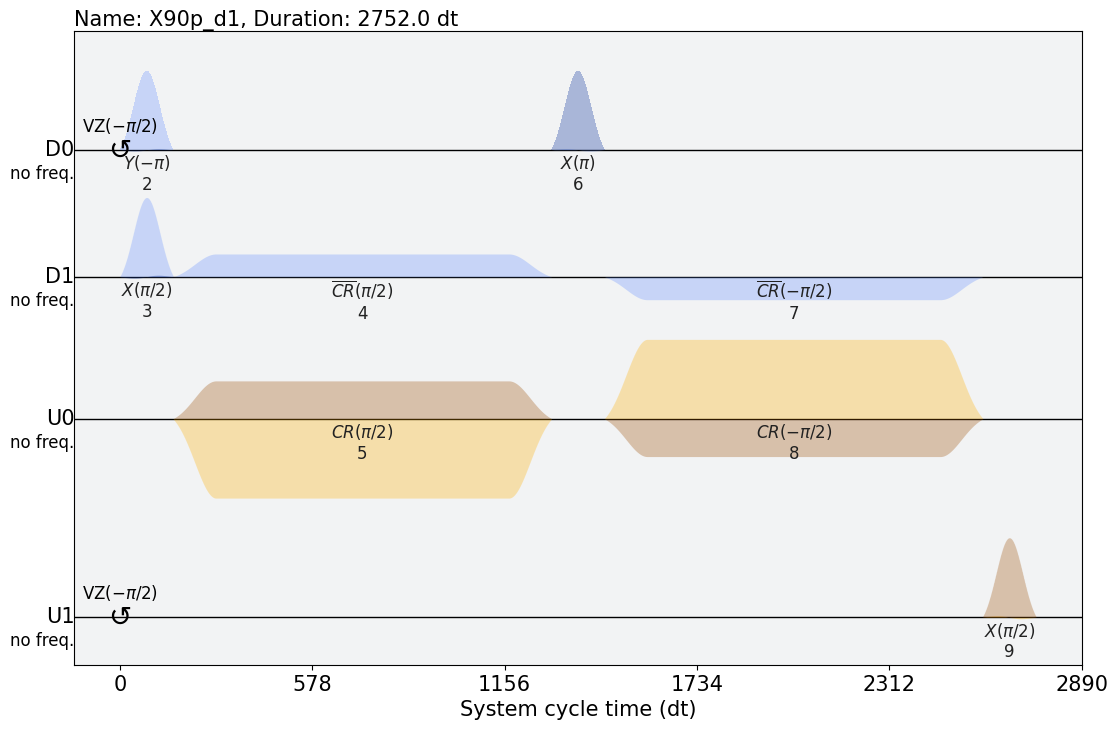

In [21]:
cx_pm.insert(
    cx_pm.get_stop_time(inst_id=7),
    inst,
    channel=qiskit.pulse.ControlChannel(1),
).draw()

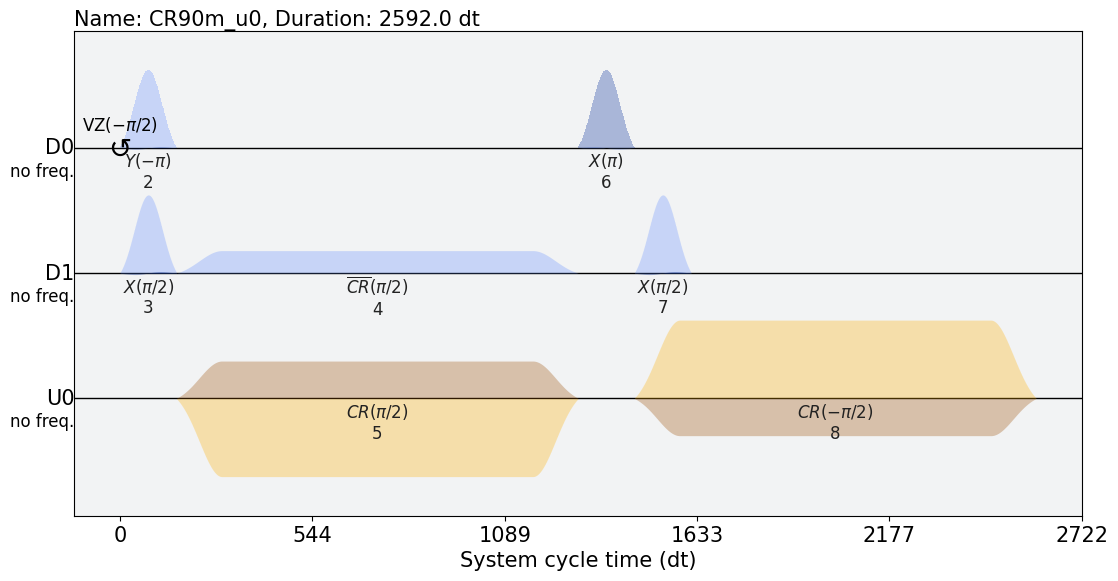

In [25]:
cx_pm.replace(
    inst_id=7,
    instruction=inst,
).draw()

In [26]:
cx_pm.insert(16 * 13, inst)

AssertionError: The requested start_time 208 overlaps with an existing instruction (CR90p_d1_u0) from 160 to 1296

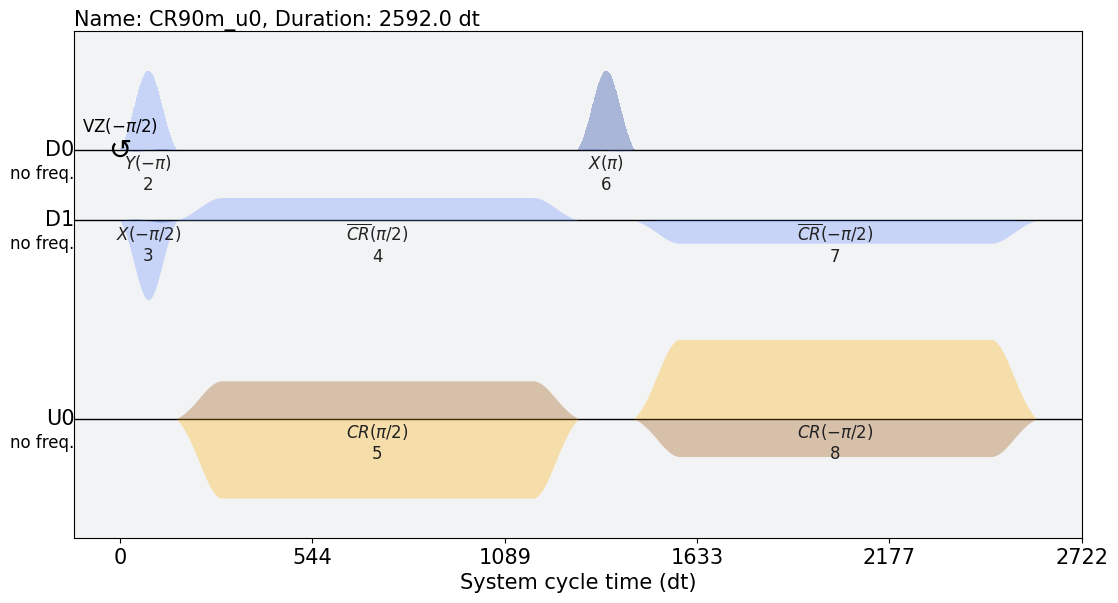

In [28]:
cx_pm.replace(inst_id=3, instruction=inst, negate=True).draw()

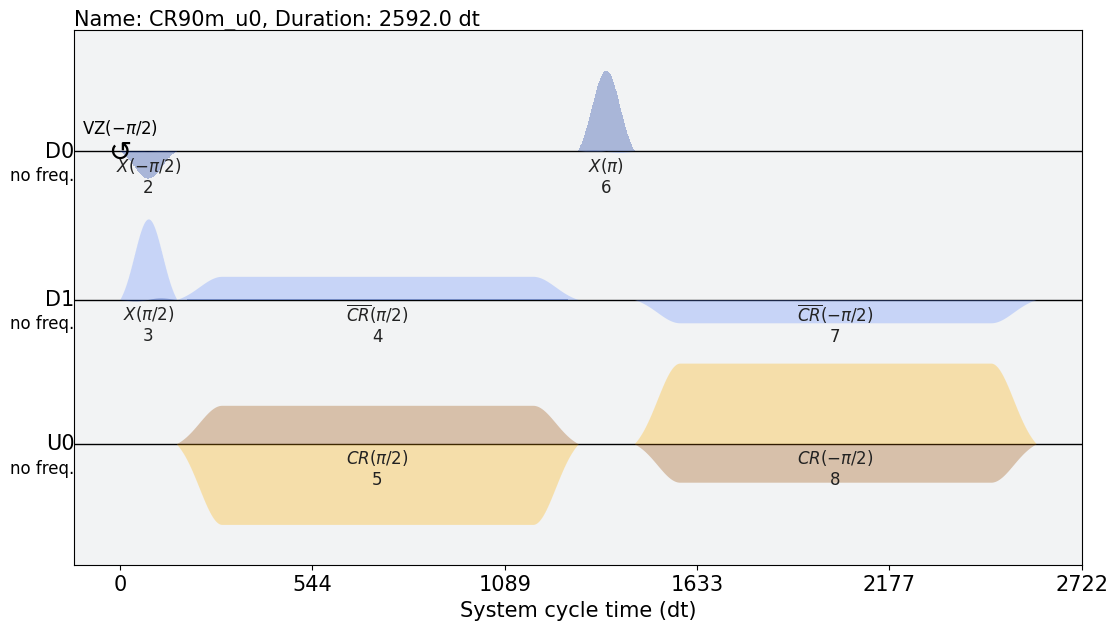

In [29]:
cx_pm.replace(inst_id=2, instruction=inst, negate=True).draw()

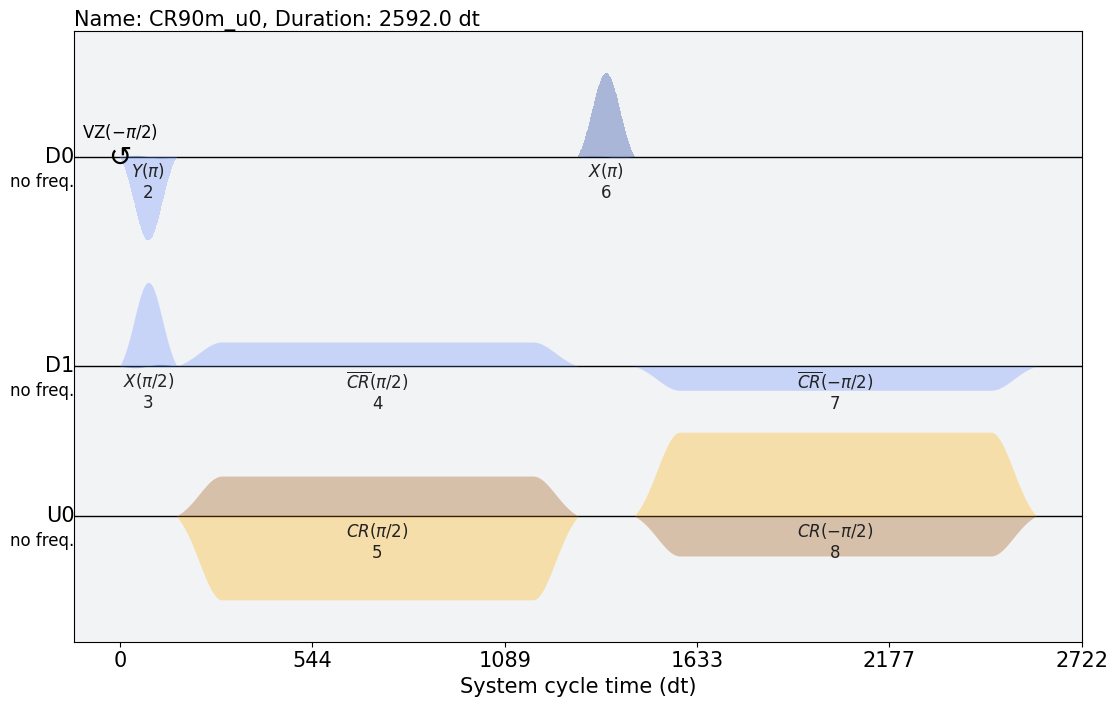

In [31]:
cx_pm.replace(inst_id=2, negate=True).draw()

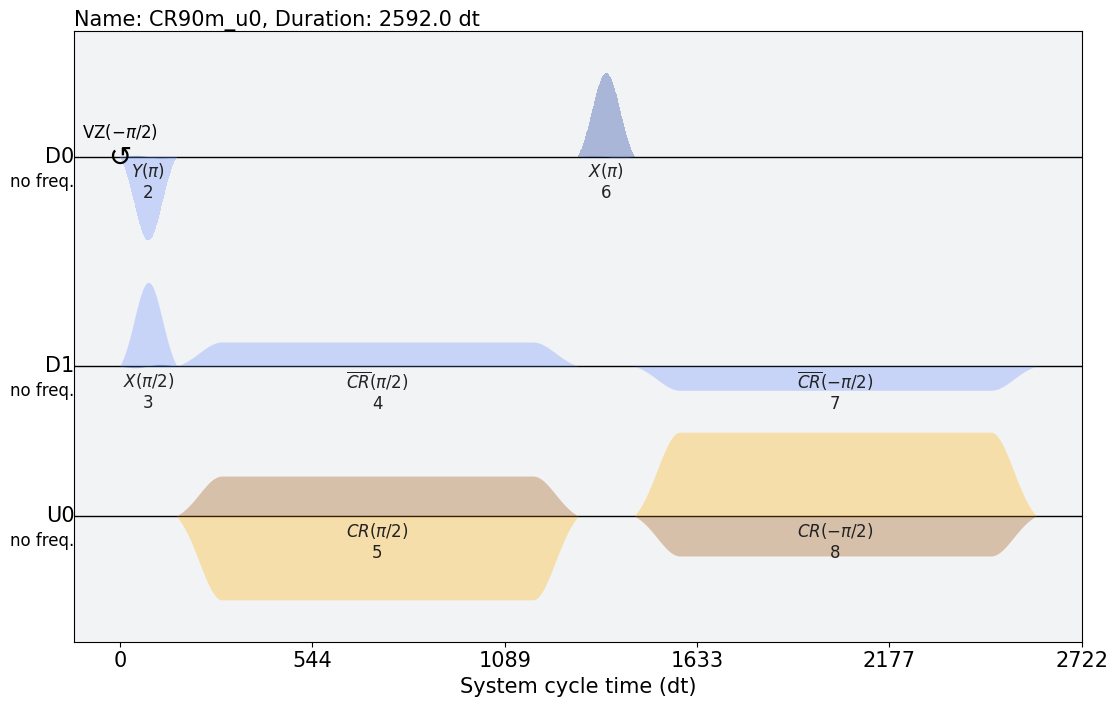

In [32]:
cx_pm.negate(inst_id=2).draw()

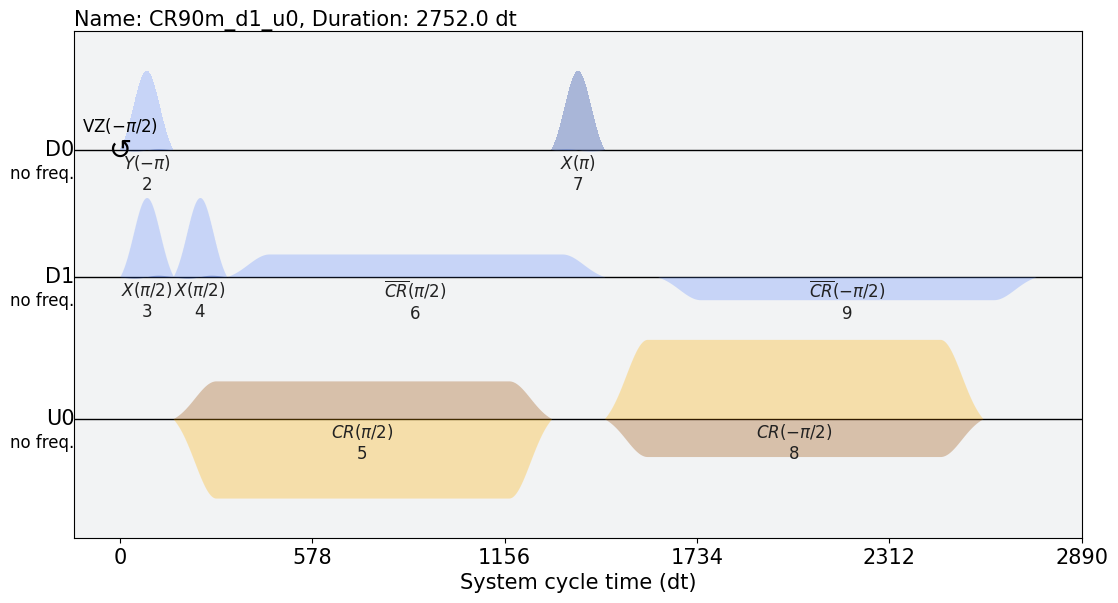

In [33]:
cx_pm.insert(
    cx_pm.get_stop_time(inst_id=3),
    inst
).draw()

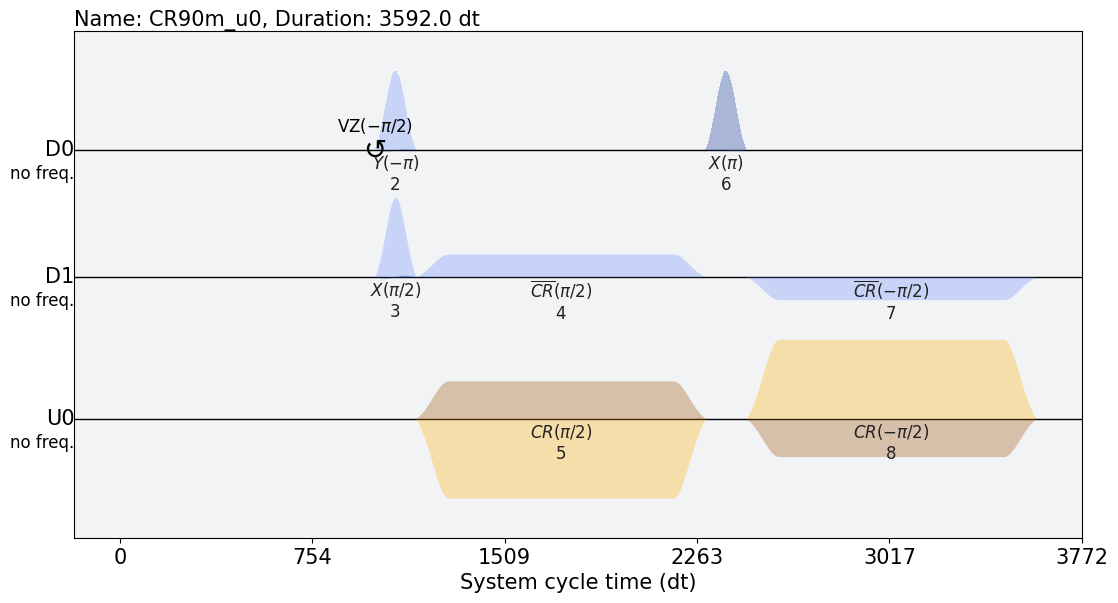

In [34]:
cx_pm.shift(1000).draw()

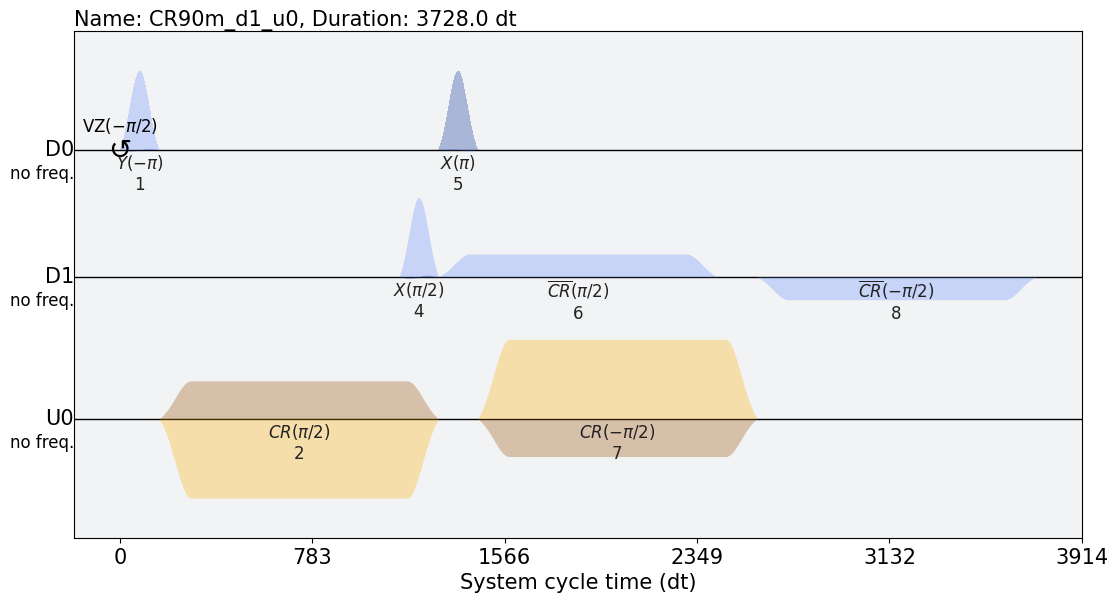

In [35]:
cx_pm.shift(
    shift_amount=cx_pm.get_duration(inst_id=4),
    channel=qiskit.pulse.DriveChannel(1)
).draw()

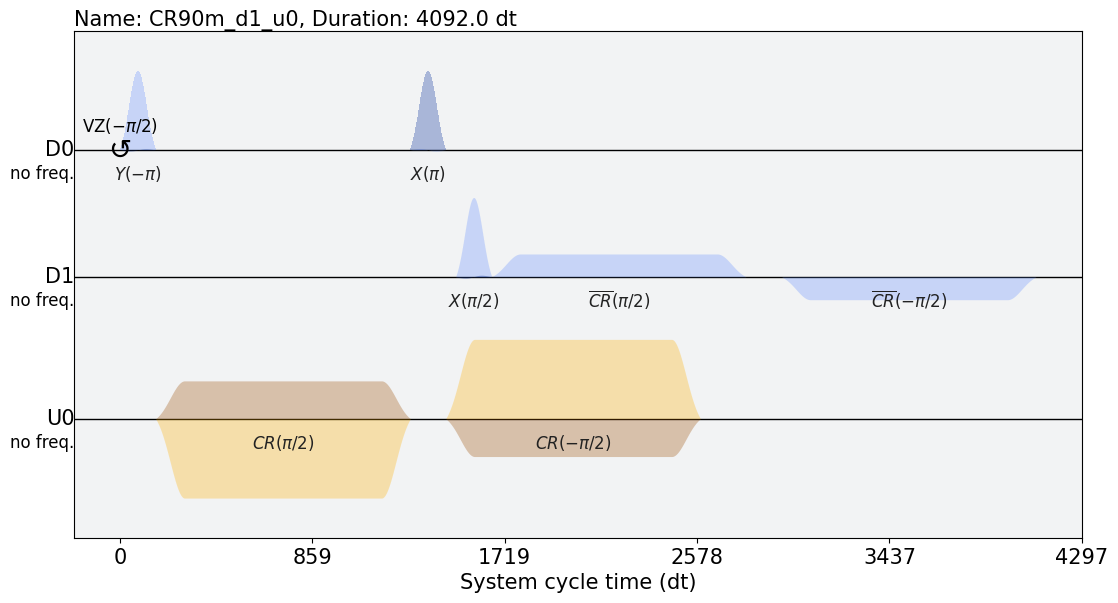

In [36]:
cx_pm.shift(1500, channel=qiskit.pulse.DriveChannel(1)).get_qiskit_schedule().draw()

In [72]:
lagos.configuration().discriminators

['hw_qmfk', 'quadratic_discriminator', 'linear_discriminator']